In [3]:
# Import all the Necessary Packages
import pandas as pd
import numpy as np
from matplotlib.colors import ListedColormap, LogNorm
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import f_oneway
import scipy.stats as stats
from scipy.stats import chi2_contingency

from tqdm import tqdm

plt.style.use('dark_background')

In [4]:
pd.set_option('display.max_columns', None)
pd.options.display.max_rows = 70

In [5]:
# Find and set the working directory for this project
os.chdir(r'C:\Users\jdrel\OneDrive\Documents\Data_Science\Springboard\Network Intrusions')

In [6]:
# Import the data and see what it looks like
data = pd.read_csv('./data/raw/kddcup.data_10_percent')
data.head()

,0,tcp,http,SF,181,5450,0.1,0.2,0.3,0.4,0.5,1,0.6,0.7,0.8,0.9,0.10,0.12,0.13,0.14,0.15,0.16,8,8.1,0.00,0.00.1,0.00.2,0.00.3,1.00,0.00.4,0.00.5,9,9.1,1.00.1,0.00.6,0.11,0.00.7,0.00.8,0.00.9,0.00.10,0.00.11,normal.
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
3,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,49,49,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.
4,0,tcp,http,SF,217,2032,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,59,59,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.


In [7]:
# I copy and pasted the column names from the website into this list
data.columns = ["duration", "protocol_type", "service", "flag", "src_bytes",
                "dst_bytes", "land", "wrong_fragment", "urgent", "hot",
                "num_failed_logins", "logged_in", "num_compromised",
                "root_shell", "su_attempted", "num_root", "num_file_creations",
                "num_shells", "num_access_files", "num_outbound_cmds", "is_host_login",
                "is_guest_login", "count", "srv_count", "serror_rate","srv_serror_rate",
                "rerror_rate", "srv_rerror_rate", "same_srv_rate", "diff_srv_rate", "srv_diff_host_rate",
                "dst_host_count", "dst_host_srv_count", "dst_host_same_srv_rate", "dst_host_diff_srv_rate",
                "dst_host_same_src_port_rate", "dst_host_srv_diff_host_rate", "dst_host_serror_rate", 
                "dst_host_srv_serror_rate", "dst_host_rerror_rate", "dst_host_srv_rerror_rate", "labels"]
data.head(3)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,0,tcp,http,SF,239,486,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,19,19,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.
1,0,tcp,http,SF,235,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,8,8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,29,29,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.
2,0,tcp,http,SF,219,1337,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,6,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,39,39,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.


In [8]:
# Define y as a binary target variable where 0 is no attack and 1 is an attack
y = np.where(data['labels'] == 'normal.', 0, 1)

In [9]:
# Use the drop methods to get rid of the constants
data = data.drop(columns = ['num_outbound_cmds', 'is_host_login'], axis = 1)

In [10]:
# Only use the X data so that it is easy to test for multicollinearity
X_data = data.drop('labels', axis = 1)

# Find the categorical columns that need to be made numerical for analysis
cat_cols = list(X_data.select_dtypes(include = 'object').columns)

# Find all of the binary columns as they act as categorical columns
bi_cols = [col for col in X_data.columns if np.array_equal(np.sort(X_data[col].unique()), np.array([0,1]))]

# Combine the columns into one list of non-numerical columns
cat_cols.extend(bi_cols)

# Add in 'su_attempted' since it is no continuous relationship between the numbers
cat_cols.append('su_attempted')

# Separate out the numerical columns from the categorical columns
X_num_data = X_data.drop(cat_cols, axis = 1)

In [11]:
# Create the scaler object
scaler = StandardScaler()
# fit the scaler to the dataset
scaler.fit(X_num_data)
# Scale the dataset
x_num_data_scaled = pd.DataFrame(scaler.transform(X_num_data), columns = X_num_data.columns)

## **<center>Multicolinearity**

#### $\\χ^2$

In [12]:
# Function to get rid of all the diagonals in correlation heatmaps
def zero_diagonal_heatmap(dfx, min = 0, max = None, color_map = None, threshhold = 0):
    # give the max a base value
    if max is None:
        max = len(dfx)
    # Create a numpy matrix that is easy to manipulate
    cm = np.matrix(abs(dfx.iloc[:,min:max].corr()))
    # Create a loop that replaces all the diagonal values with 0
    for i in range(len(cm)):
        # Loop thorough the other axis of values
        for j in range(len(cm)):
            # All diagonal values happen when i == j
            if i == j:
                # set the diagonal value equal to 0
                cm[i,j] = 0
    df_cm = pd.DataFrame(cm, columns = list(dfx.columns)[min:max], index = list(dfx.columns)[min:max])
    # Make the plot bigger
    plt.figure(figsize=(12, 8))
    # Plot the heatmap
    ax = sns.heatmap(df_cm, cmap = color_map, center = threshhold, vmin = 0, vmax = 1);

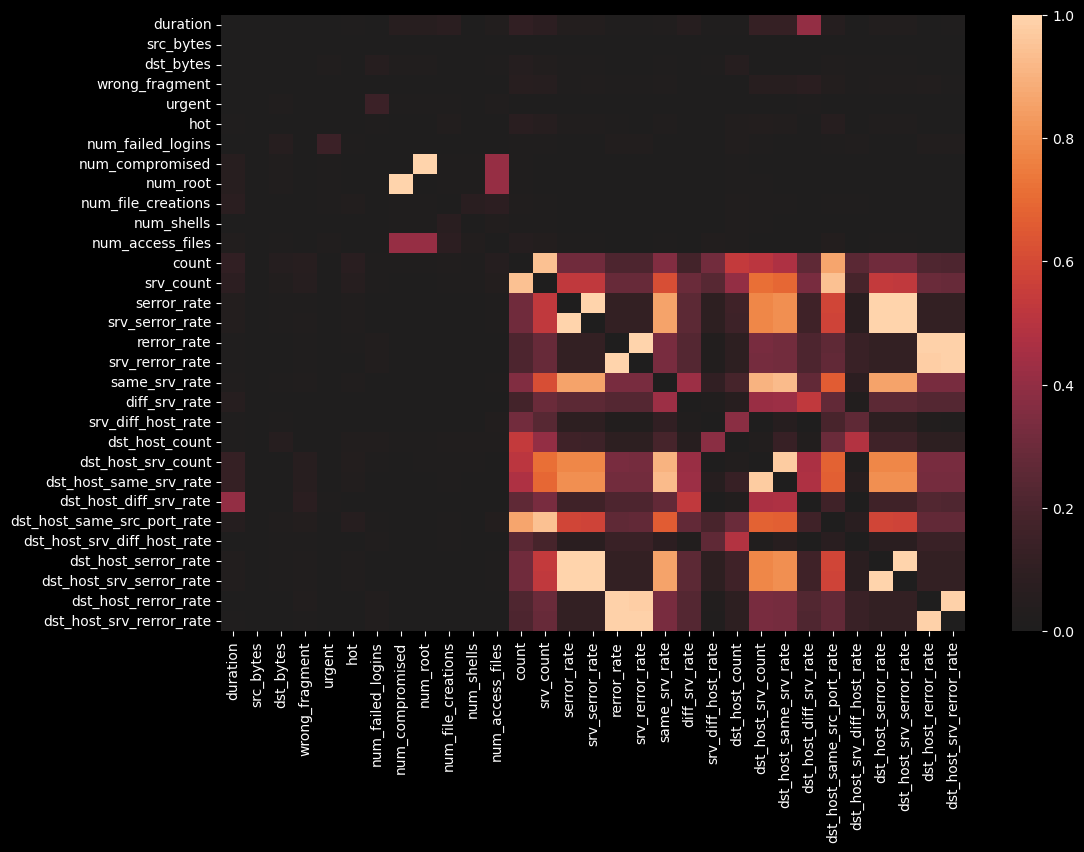

In [13]:
zero_diagonal_heatmap(x_num_data_scaled)

In [14]:
# Define the Syn Error columns
serror = ['serror_rate', 'srv_serror_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate']

# Define the Syn Error columns
rerror = ['rerror_rate', 'srv_rerror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

# Drop the redundant columns
df = x_num_data_scaled.drop(columns = [*serror, *rerror])

# Create new Syn Error column as mean of the former Syn Error columns
df['Syn Error'] = x_num_data_scaled[serror].max(axis = 1)


# Create new Syn Error column as mean of the former Syn Error columns
df['Rej Error'] = x_num_data_scaled[rerror].max(axis = 1)

In [15]:
# Create a function that takes a dataframe and a correlation level 
def corr_dict(dfx, corr = 0.7):
    # Create the correlation with absolute values to measure collinearity
    corr_mat = abs(dfx.corr()) > corr   # type: ignore
    # Define the dictionary outside the function for uses
    global correl_dict
    # Create a dictionary with sorted values so that it is easy to see the next steps
    correl_dict = corr_mat.sum().sort_values(ascending = False).to_dict()
    # Subtract each value by one for the self correlation on the diagonal
    correl_dict = {key: value - 1 for key, value in correl_dict.items() if value > 0}
    # Print the dictionary
    print(correl_dict)

In [16]:
corr_dict(df, corr = 0.7)

{'dst_host_srv_count': 4, 'same_srv_rate': 3, 'Syn Error': 3, 'dst_host_same_srv_rate': 3, 'srv_count': 3, 'count': 2, 'dst_host_same_src_port_rate': 2, 'num_compromised': 1, 'num_root': 1, 'dst_host_srv_diff_host_rate': 0, 'dst_host_diff_srv_rate': 0, 'dst_host_count': 0, 'srv_diff_host_rate': 0, 'diff_srv_rate': 0, 'duration': 0, 'src_bytes': 0, 'num_access_files': 0, 'num_shells': 0, 'num_file_creations': 0, 'num_failed_logins': 0, 'hot': 0, 'urgent': 0, 'wrong_fragment': 0, 'dst_bytes': 0, 'Rej Error': 0}


In [17]:
# Create a function that takes a list of features and minimum number of correlations
def corr_list(min_corr, corr, still_high_mcl = None):
    # Define the dictionary where all the information will be stored
    correlations2 = {}
    # Almost always the default value will be None
    if still_high_mcl is None:
        # # the default list is the keys from correl_dict whose values are at least min_corr
        still_high_mcl = [key for key, value in correl_dict.items() if value >= min_corr]
    # Store the correlation matrix in a variable for easy use  
    still_corr = abs(df[still_high_mcl].corr())
    # Put the index and column names as the feature names
    still_corr.columns = still_high_mcl
    still_corr.index = still_high_mcl #type: ignore
    # Iterate through all the features in the list
    for shm in still_high_mcl:
        # create a list of all the features that have a correlation of over 7
        corrs2 = still_corr.index[still_corr[shm] > corr].tolist() #type: ignore
        # remove the self correlation
        corrs2.remove(shm)
        # input the feature and list into the dictionary
        correlations2.update({shm: corrs2})
    # print the result    
    print(correlations2)

In [18]:
corr_list(corr = .7, min_corr = 2)

{'dst_host_srv_count': ['same_srv_rate', 'Syn Error', 'dst_host_same_srv_rate', 'srv_count'], 'same_srv_rate': ['dst_host_srv_count', 'Syn Error', 'dst_host_same_srv_rate'], 'Syn Error': ['dst_host_srv_count', 'same_srv_rate', 'dst_host_same_srv_rate'], 'dst_host_same_srv_rate': ['dst_host_srv_count', 'same_srv_rate', 'Syn Error'], 'srv_count': ['dst_host_srv_count', 'count', 'dst_host_same_src_port_rate'], 'count': ['srv_count', 'dst_host_same_src_port_rate'], 'dst_host_same_src_port_rate': ['srv_count', 'count']}


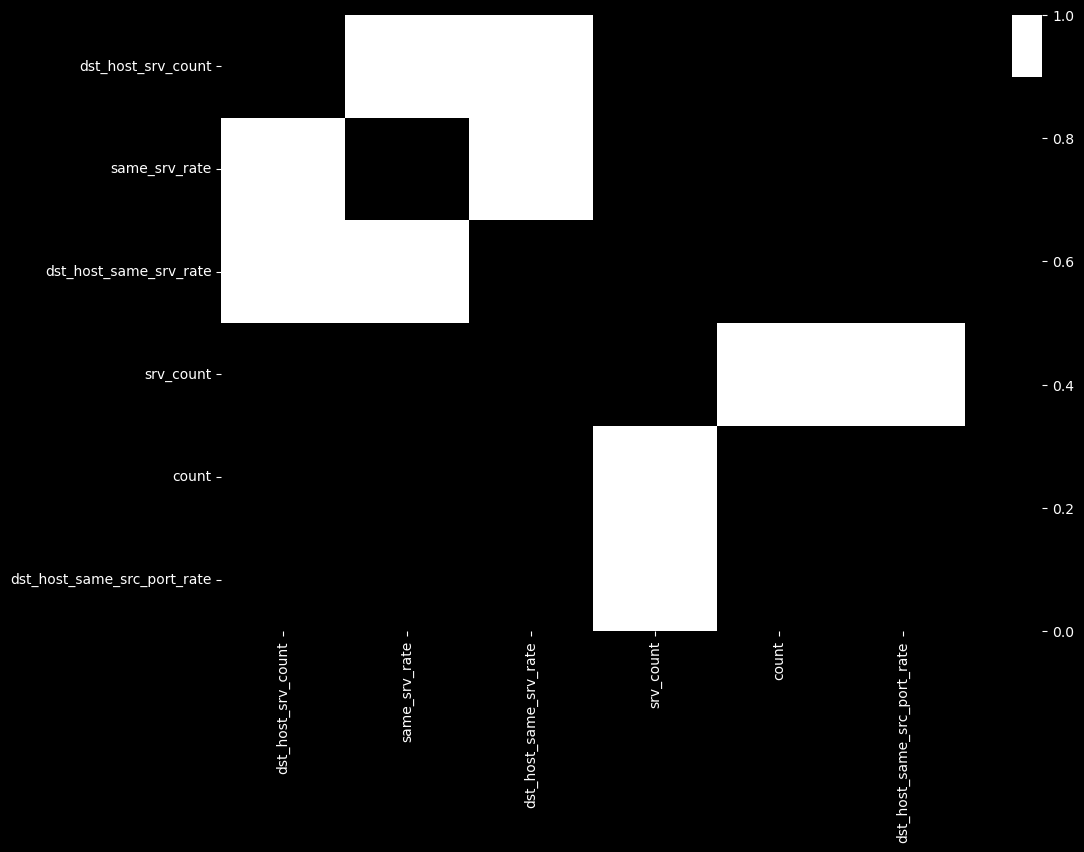

In [19]:
# Get all the features from the dictionary in the previous cell
left = [key for key, value in correl_dict.items() if value >= 2]
# remove Syn Error till it is urgent
left.remove('Syn Error')

# Define the dataframe X_left which has every feature with 5 or more collinearities
df_left = df[left]
# Create a heatmap of all the features that left
zero_diagonal_heatmap(df_left, color_map = ListedColormap(['black', 'white']), threshhold = 0.9) #type: ignore

In [20]:
# Drop These columns that have no clear connection but are multicollinear
df = df.drop(['srv_count', 'dst_host_same_src_port_rate'],axis = 1)

# Drop the non-rate column
df = df.drop('dst_host_srv_count', axis = 1)

# Create the srv_rate column
srvrate = ['dst_host_same_srv_rate', 'same_srv_rate']

# Define srvrate
df['srv_rate'] = df[srvrate].max(axis = 1)

# Drop the srvrate columns
df = df.drop(srvrate, axis = 1)

In [21]:
corr_dict(df)

{'srv_rate': 1, 'Syn Error': 1, 'num_compromised': 1, 'num_root': 1, 'count': 0, 'Rej Error': 0, 'dst_host_srv_diff_host_rate': 0, 'dst_host_diff_srv_rate': 0, 'dst_host_count': 0, 'srv_diff_host_rate': 0, 'diff_srv_rate': 0, 'duration': 0, 'num_access_files': 0, 'src_bytes': 0, 'num_file_creations': 0, 'num_failed_logins': 0, 'hot': 0, 'urgent': 0, 'wrong_fragment': 0, 'dst_bytes': 0, 'num_shells': 0}


In [22]:
corr_list(corr = .7, min_corr = 0)

{'srv_rate': ['Syn Error'], 'Syn Error': ['srv_rate'], 'num_compromised': ['num_root'], 'num_root': ['num_compromised'], 'count': [], 'Rej Error': [], 'dst_host_srv_diff_host_rate': [], 'dst_host_diff_srv_rate': [], 'dst_host_count': [], 'srv_diff_host_rate': [], 'diff_srv_rate': [], 'duration': [], 'num_access_files': [], 'src_bytes': [], 'num_file_creations': [], 'num_failed_logins': [], 'hot': [], 'urgent': [], 'wrong_fragment': [], 'dst_bytes': [], 'num_shells': []}


In [23]:
# Drop these features as well for MCL and they aren't as good as their collinearities
df = df.drop(['num_root', 'srv_rate'], axis = 1)

In [24]:
corr_dict(df)

{'duration': 0, 'num_access_files': 0, 'Syn Error': 0, 'dst_host_srv_diff_host_rate': 0, 'dst_host_diff_srv_rate': 0, 'dst_host_count': 0, 'srv_diff_host_rate': 0, 'diff_srv_rate': 0, 'count': 0, 'num_shells': 0, 'src_bytes': 0, 'num_file_creations': 0, 'num_compromised': 0, 'num_failed_logins': 0, 'hot': 0, 'urgent': 0, 'wrong_fragment': 0, 'dst_bytes': 0, 'Rej Error': 0}


In [25]:
corr_list(corr = .7, min_corr = 0)

{'duration': [], 'num_access_files': [], 'Syn Error': [], 'dst_host_srv_diff_host_rate': [], 'dst_host_diff_srv_rate': [], 'dst_host_count': [], 'srv_diff_host_rate': [], 'diff_srv_rate': [], 'count': [], 'num_shells': [], 'src_bytes': [], 'num_file_creations': [], 'num_compromised': [], 'num_failed_logins': [], 'hot': [], 'urgent': [], 'wrong_fragment': [], 'dst_bytes': [], 'Rej Error': []}


To make sure that I had fully eliminated the multicollinearity I calculated every remaining feature’s Variance Inflation Factor (VIF). The formula for VIF is:
$$VIF=\frac{1}{1-R^2}$$                                                  
Where ${R^2}$ is the R-squared value that represents correlations.   

In [26]:
# Create vif function with a dataframe as the argument
def vif(dfx):
    #calculate the vif for the dataframe to see if it is non collinear
    vifs = [variance_inflation_factor(dfx.values, i) for i in range(dfx.shape[1])]
    # Put those numbers into a dictionary
    vif_dict = {dfx.columns[i]:vifs[i] for i in range(dfx.shape[1])}
    # Create a filtered dictionary to find out how many features have a VIF under 2.5
    filtered_dict = {k: v for k, v in vif_dict.items() if v < 2.5}
    # Print the amount of columns that aren't collinear out of all the columns
    print(f"{len(filtered_dict)} out of {len(dfx.columns)} features have a vif < 2.5")
    # Create a sorted dictionary based on the values
    vif_dict = {k:v for k, v in sorted(vif_dict.items(), key=lambda item: item[1], reverse = True)}
    # Print the result
    print(vif_dict)

In [27]:
# Run the variance_inflation_factor function
vif(df)

19 out of 19 features have a vif < 2.5
{'count': 2.1975522237811886, 'dst_host_count': 2.150253892859811, 'dst_host_diff_srv_rate': 1.843052493168811, 'diff_srv_rate': 1.552971392836791, 'Syn Error': 1.52227282215801, 'dst_host_srv_diff_host_rate': 1.3582878959669218, 'duration': 1.2912725418003075, 'srv_diff_host_rate': 1.2340366187755867, 'Rej Error': 1.2298809682969896, 'num_access_files': 1.2180456266818096, 'num_compromised': 1.2113859731426935, 'num_failed_logins': 1.0244205042245949, 'urgent': 1.0215642217044607, 'num_file_creations': 1.018909530068689, 'wrong_fragment': 1.0161589294221214, 'hot': 1.0104735463990853, 'dst_bytes': 1.0066102686965392, 'num_shells': 1.005330112211559, 'src_bytes': 1.0001121220513494}


In [28]:
cat_cols

['protocol_type',
 'service',
 'flag',
 'land',
 'logged_in',
 'root_shell',
 'is_guest_login',
 'su_attempted']

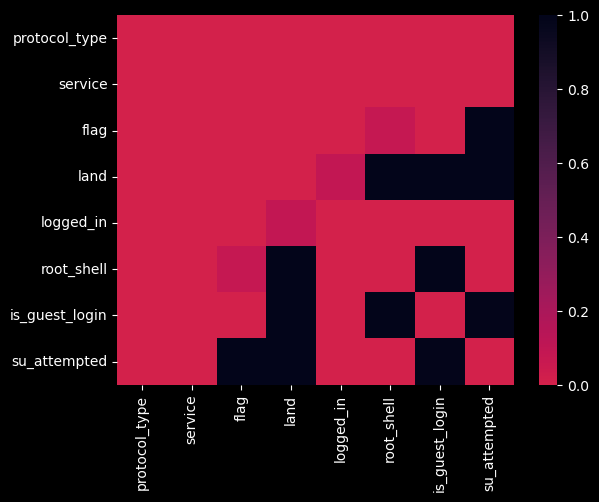

In [29]:
# create an empty dictionary to store the results
chi_p = {}

# loop through each feature and perform the chi-square test
for feature1 in cat_cols:
    # Initialize a list to store the p-values in
    p_vals = []
    # Iterate through all of features to get each element compared to each other
    for feature2 in cat_cols:       
        # create a contingency table for the feature and the target variable
        table = pd.crosstab(X_data[feature1], X_data[feature2])
        # perform the chi-square test and get the p-value
        _, p, _, _ = chi2_contingency(table)
        # Add the p_values to the list for feature 1
        p_vals.append(p)
    # store the p-value in the results dictionary
    chi_p[feature1] = p_vals

chi_p_df = pd.DataFrame(chi_p, index = cat_cols)

# print the results
sns.heatmap(pd.DataFrame(chi_p, index = cat_cols), center = 0.05, cmap = 'rocket_r');

In [30]:
data['land'].value_counts()

0    493998
1        22
Name: land, dtype: int64

In [31]:
for col in cat_cols:
    print(f'{col}: {len(data[col].unique())}')

protocol_type: 3
service: 66
flag: 11
land: 2
logged_in: 2
root_shell: 2
is_guest_login: 2
su_attempted: 3


In [32]:
for col in cat_cols:
    print(data[col].value_counts())

icmp    283602
tcp     190064
udp      20354
Name: protocol_type, dtype: int64
ecr_i          281400
private        110893
http            64292
smtp             9723
other            7237
domain_u         5863
ftp_data         4721
eco_i            1642
ftp               798
finger            670
urp_i             538
telnet            513
ntp_u             380
auth              328
pop_3             202
time              157
csnet_ns          126
remote_job        120
gopher            117
imap4             117
discard           116
domain            116
iso_tsap          115
systat            115
shell             112
echo              112
rje               111
whois             110
sql_net           110
printer           109
nntp              108
courier           108
sunrpc            107
netbios_ssn       107
mtp               107
vmnet             106
uucp_path         106
uucp              106
klogin            106
bgp               106
ssh               105
supdup            1

In [33]:
ct_o = pd.crosstab(data["protocol_type"], data["service"], margins=True)
ct_o

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,0,0,0,0,0,0,0,0,0,0,0,0,0,1642,281400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,7,0,14,538,0,0,0,0,283602
tcp,43,11,92,328,106,108,126,97,103,116,116,0,112,0,0,103,99,670,798,4721,117,104,64292,99,117,115,106,98,101,102,104,107,98,99,102,107,95,105,108,0,1639,1,101,202,109,102381,0,120,111,112,9723,110,105,107,105,115,513,0,0,157,0,0,106,106,106,110,190064
udp,0,0,0,0,0,0,0,0,0,0,0,5863,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,380,5598,0,0,0,0,8512,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,20354
All,43,11,92,328,106,108,126,97,103,116,116,5863,112,1642,281400,103,99,670,798,4721,117,104,64292,99,117,115,106,98,101,102,104,107,98,99,102,107,95,105,108,380,7237,1,101,202,109,110893,1,120,111,112,9723,110,105,107,105,115,513,1,7,157,14,538,106,106,106,110,494020


In [34]:
ct_service = np.array(ct_o.iloc[3,:]).reshape(1,67)
ct_protocol_type = np.array(ct_o.iloc[:-1,-1]).reshape(3,1)
ct_expect = (ct_protocol_type @ ct_service)/494020

In [35]:
ct_e = round(pd.DataFrame(ct_expect, columns = ct_o.columns, index = ct_o.index[:-1]),2)

In [36]:
ct_e

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois,All
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,24.69,6.31,52.81,188.29,60.85,62.00,72.33,55.68,59.13,66.59,66.59,3365.77,64.30,942.62,161543.26,59.13,56.83,384.63,458.11,2710.18,67.17,59.70,36908.10,56.83,67.17,66.02,60.85,56.26,57.98,58.56,59.70,61.43,56.26,56.83,58.56,61.43,54.54,60.28,62.00,218.15,4154.54,0.57,57.98,115.96,62.57,63660.33,0.57,68.89,63.72,64.30,5581.68,63.15,60.28,61.43,60.28,66.02,294.50,0.57,4.02,90.13,8.04,308.85,60.85,60.85,60.85,63.15,283602.0
tcp,16.54,4.23,35.40,126.19,40.78,41.55,48.48,37.32,39.63,44.63,44.63,2255.67,43.09,631.73,108262.84,39.63,38.09,257.77,307.01,1816.31,45.01,40.01,24735.02,38.09,45.01,44.24,40.78,37.70,38.86,39.24,40.01,41.17,37.70,38.09,39.24,41.17,36.55,40.40,41.55,146.20,2784.29,0.38,38.86,77.72,41.94,42663.79,0.38,46.17,42.70,43.09,3740.72,42.32,40.40,41.17,40.40,44.24,197.37,0.38,2.69,60.40,5.39,206.98,40.78,40.78,40.78,42.32,190064.0
udp,1.77,0.45,3.79,13.51,4.37,4.45,5.19,4.00,4.24,4.78,4.78,241.56,4.61,67.65,11593.89,4.24,4.08,27.60,32.88,194.51,4.82,4.28,2648.88,4.08,4.82,4.74,4.37,4.04,4.16,4.20,4.28,4.41,4.04,4.08,4.20,4.41,3.91,4.33,4.45,15.66,298.17,0.04,4.16,8.32,4.49,4568.88,0.04,4.94,4.57,4.61,400.60,4.53,4.33,4.41,4.33,4.74,21.14,0.04,0.29,6.47,0.58,22.17,4.37,4.37,4.37,4.53,20354.0


In [37]:
(ct_o.iloc[:-1,:-1]-ct_e.iloc[:,:-1])

service,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,-24.69,-6.31,-52.81,-188.29,-60.85,-62.00,-72.33,-55.68,-59.13,-66.59,-66.59,-3365.77,-64.30,699.38,119856.74,-59.13,-56.83,-384.63,-458.11,-2710.18,-67.17,-59.70,-36908.10,-56.83,-67.17,-66.02,-60.85,-56.26,-57.98,-58.56,-59.70,-61.43,-56.26,-56.83,-58.56,-61.43,-54.54,-60.28,-62.00,-218.15,-4154.54,-0.57,-57.98,-115.96,-62.57,-63660.33,0.43,-68.89,-63.72,-64.30,-5581.68,-63.15,-60.28,-61.43,-60.28,-66.02,-294.50,-0.57,2.98,-90.13,5.96,229.15,-60.85,-60.85,-60.85,-63.15
tcp,26.46,6.77,56.60,201.81,65.22,66.45,77.52,59.68,63.37,71.37,71.37,-2255.67,68.91,-631.73,-108262.84,63.37,60.91,412.23,490.99,2904.69,71.99,63.99,39556.98,60.91,71.99,70.76,65.22,60.30,62.14,62.76,63.99,65.83,60.30,60.91,62.76,65.83,58.45,64.60,66.45,-146.20,-1145.29,0.62,62.14,124.28,67.06,59717.21,-0.38,73.83,68.30,68.91,5982.28,67.68,64.60,65.83,64.60,70.76,315.63,-0.38,-2.69,96.60,-5.39,-206.98,65.22,65.22,65.22,67.68
udp,-1.77,-0.45,-3.79,-13.51,-4.37,-4.45,-5.19,-4.00,-4.24,-4.78,-4.78,5621.44,-4.61,-67.65,-11593.89,-4.24,-4.08,-27.60,-32.88,-194.51,-4.82,-4.28,-2648.88,-4.08,-4.82,-4.74,-4.37,-4.04,-4.16,-4.20,-4.28,-4.41,-4.04,-4.08,-4.20,-4.41,-3.91,-4.33,-4.45,364.34,5299.83,-0.04,-4.16,-8.32,-4.49,3943.12,-0.04,-4.94,-4.57,-4.61,-400.60,-4.53,-4.33,-4.41,-4.33,-4.74,-21.14,0.96,-0.29,-6.47,-0.58,-22.17,-4.37,-4.37,-4.37,-4.53


In [38]:
chi_presum = ((ct_o.iloc[:-1,:-1]-ct_e.iloc[:,:-1])**2)/ct_e
chi_presum

service,All,IRC,X11,Z39_50,auth,bgp,courier,csnet_ns,ctf,daytime,discard,domain,domain_u,echo,eco_i,ecr_i,efs,exec,finger,ftp,ftp_data,gopher,hostnames,http,http_443,imap4,iso_tsap,klogin,kshell,ldap,link,login,mtp,name,netbios_dgm,netbios_ns,netbios_ssn,netstat,nnsp,nntp,ntp_u,other,pm_dump,pop_2,pop_3,printer,private,red_i,remote_job,rje,shell,smtp,sql_net,ssh,sunrpc,supdup,systat,telnet,tftp_u,tim_i,time,urh_i,urp_i,uucp,uucp_path,vmnet,whois
protocol_type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
icmp,NaN,24.690000,6.310000,52.810000,188.29000,60.850000,62.000000,72.330000,55.680000,59.130000,66.590000,66.590000,3365.770000,64.300000,518.907284,88927.499194,59.130000,56.83000,384.630000,458.110000,2710.180000,67.170000,59.700000,36908.100000,56.83000,67.170000,66.020000,60.850000,56.260000,57.980000,58.560000,59.700000,61.430000,56.260000,56.83000,58.560000,61.430000,54.540000,60.28000,62.000000,218.150000,4154.540000,0.570000,57.980000,115.960000,62.570000,63660.330000,0.324386,68.890000,63.720000,64.300000,5581.680000,63.150000,60.28000,61.430000,60.28000,66.020000,294.500000,0.57,2.209055,90.130000,4.418109,170.01691,60.850000,60.850000,60.850000,63.150000
tcp,NaN,42.329601,10.835201,90.496045,322.74567,104.307219,106.272022,123.955248,95.436827,101.331236,114.131232,114.131232,2255.670000,110.201627,631.730000,108262.840000,101.331236,97.40163,659.244958,785.222566,4645.255488,115.142415,102.342417,63260.699475,97.40163,115.142415,113.177613,104.307219,96.448011,99.366433,100.377615,102.342417,105.260843,96.448011,97.40163,100.377615,105.260843,93.472025,103.29604,106.272022,146.200000,471.103651,1.011579,99.366433,198.732867,107.225646,83587.163029,0.380000,118.060838,109.248009,110.201627,9567.055005,108.236824,103.29604,105.260843,103.29604,113.177613,504.748933,0.38,2.690000,154.496026,5.390000,206.98000,104.307219,104.307219,104.307219,108.236824
udp,NaN,1.770000,0.450000,3.790000,13.51000,4.370000,4.450000,5.190000,4.000000,4.240000,4.780000,4.780000,130818.793151,4.610000,67.650000,11593.890000,4.240000,4.08000,27.600000,32.880000,194.510000,4.820000,4.280000,2648.880000,4.08000,4.820000,4.740000,4.370000,4.040000,4.160000,4.200000,4.280000,4.410000,4.040000,4.08000,4.200000,4.410000,3.910000,4.33000,4.450000,8476.605083,94201.958711,0.040000,4.160000,8.320000,4.490000,3403.064938,0.040000,4.940000,4.570000,4.610000,400.600000,4.530000,4.33000,4.410000,4.33000,4.740000,21.140000,23.04,0.290000,6.470000,0.580000,22.17000,4.370000,4.370000,4.370000,4.530000


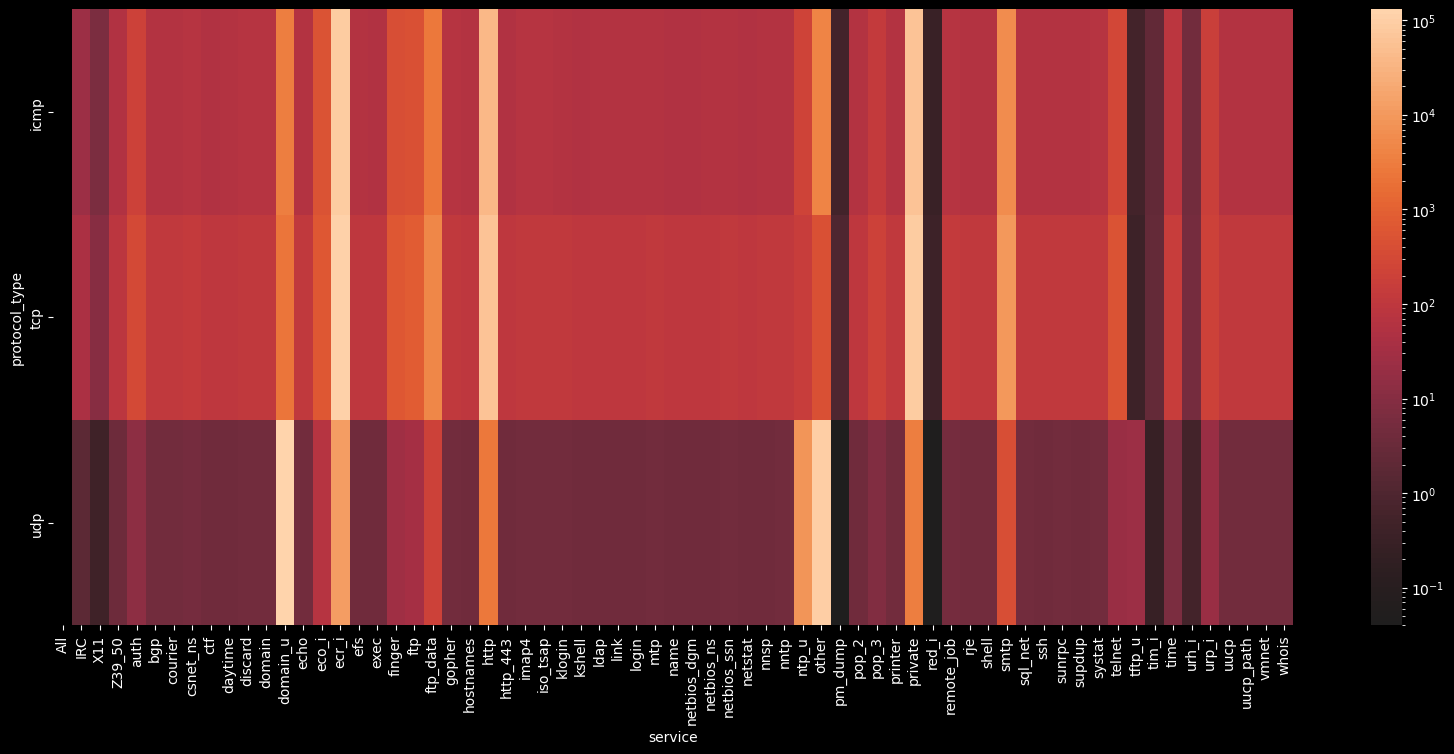

In [39]:
plt.figure(figsize = (20,8))
sns.heatmap(abs(chi_presum), center = 4, norm = LogNorm());

In [40]:
data['service'].value_counts()

ecr_i          281400
private        110893
http            64292
smtp             9723
other            7237
domain_u         5863
ftp_data         4721
eco_i            1642
ftp               798
finger            670
urp_i             538
telnet            513
ntp_u             380
auth              328
pop_3             202
time              157
csnet_ns          126
remote_job        120
gopher            117
imap4             117
discard           116
domain            116
iso_tsap          115
systat            115
shell             112
echo              112
rje               111
whois             110
sql_net           110
printer           109
nntp              108
courier           108
sunrpc            107
netbios_ssn       107
mtp               107
vmnet             106
uucp_path         106
uucp              106
klogin            106
bgp               106
ssh               105
supdup            105
nnsp              105
login             104
hostnames         104
efs       

Since the only categories that don't have massively high $χ^2$ scores only occur once in the entire dataset it is clear that protocol type and tcp are to close to keep together from multi colinearity. For that reason I'm dropping all the columns except for `service` 

In [41]:
print(cat_cols)

['protocol_type', 'service', 'flag', 'land', 'logged_in', 'root_shell', 'is_guest_login', 'su_attempted']


In [42]:
cc_data = data.drop(['protocol_type', 'flag', 'land', 'logged_in', 'root_shell', 'is_guest_login', 'su_attempted','labels'], axis = 1)

In [43]:
cc_data

,duration,service,src_bytes,dst_bytes,wrong_fragment,urgent,hot,num_failed_logins,num_compromised,num_root,num_file_creations,num_shells,num_access_files,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
0,0,http,239,486,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,19,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0
1,0,http,235,1337,0,0,0,0,0,0,0,0,0,8,8,0.00,0.00,0.0,0.0,1.0,0.0,0.00,29,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
2,0,http,219,1337,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,39,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0
3,0,http,217,2032,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,49,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
4,0,http,217,2032,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,59,59,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,http,310,1881,0,0,0,0,0,0,0,0,0,4,5,0.00,0.00,0.0,0.0,1.0,0.0,0.40,86,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0
494016,0,http,282,2286,0,0,0,0,0,0,0,0,0,6,6,0.00,0.00,0.0,0.0,1.0,0.0,0.00,6,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0
494017,0,http,203,1200,0,0,0,0,0,0,0,0,0,6,18,0.17,0.11,0.0,0.0,1.0,0.0,0.17,16,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0
494018,0,http,291,1200,0,0,0,0,0,0,0,0,0,6,12,0.00,0.00,0.0,0.0,1.0,0.0,0.17,26,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0


In [44]:
grouped = cc_data.groupby('service')[list(cc_data.drop('service', axis = 1).columns)]
grouped

In [45]:
f_val, p_val = f_oneway(*[group for name, group in grouped])

print("F-value: ", f_val)
print("p-value: ", p_val*66)

F-value:  [2.39147987e+03 1.17081182e+01 1.41197700e+02 4.82406036e+01
 6.00642333e+01 1.20116243e+04 7.48136664e+02 7.69876145e+01
 7.22306149e+01 2.27865526e+02 7.72531819e+01 5.41497174e+01
 1.17877213e+05 7.68316774e+05 1.59967560e+04 1.58590936e+04
 9.87086262e+02 9.85235267e+02 5.07556205e+04 2.93744290e+03
 3.57689562e+03 9.04046950e+03 6.20988777e+04 7.60956545e+04
 2.29497651e+04 1.57037586e+05 5.69712972e+03 1.59575926e+04
 1.59152010e+04 9.99557068e+02 1.00003326e+03]
p-value:  [0.00000000e+000 2.11192656e-117 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000 0.00000000e+000
 0.00000000e+000 0.00000000e+000 0.00000000e+000]


## <center> **Lasso Regularization**

Lasso Regularization is a technique for variable selection that uses regression to evaluate the effect that features have on a target variable. The idea is to add a penalty term that contains the coefficient or slope of the variables with respect to the target variable multiplied by parameter. 
\begin{equation}
Loss(β_1,...β_n) = SSD + \alpha|β| \nonumber
\end{equation}
Where $\beta$ is the coefficient of the feature, SSD is the sum of squared distances of the point to the regression line and $\alpha$ is the penalty’s parameter. If there is more than a single feature, then we can sum the coefficients:
\begin{equation}
Loss(β_1,...β_n) = SSD + \alpha* \sum_{i=1}^{n}|β_i| \nonumber
\end{equation}
Lasso aims to reduce the loss in equation (3). If a feature is not important, then changing its slope will not move the regression line close enough to the data points to decrease the loss function with a non-zero value. If a feature is important, the regression line will move towards the data and minimize the SSD faster than it increases the penalty term. Since only features with non-zero coefficients are meaningful, I can discard all the features with a coefficient of zero. 



First we will run a gridsearch to find the best value of $\alpha$, and then we will use the coeffecients from that value of $\alpha$ to determine which features stay in the model.

In [46]:
# Create Lasso model
lasso = Lasso(max_iter = 50000)

# Define hyperparameter grid with a value less than 00.5 since that was the be
params = {'alpha': np.linspace(.001, .01, 20)}

# Perform grid search
grid_search = GridSearchCV(estimator=lasso, param_grid=params, cv=8)

# fit the gridsearch of parameters to the data
grid_search.fit(df, y)

# Print best hyperparameters
print("Best hyperparameters: ", grid_search.best_params_)

Best hyperparameters:  {'alpha': 0.0076315789473684215}


In [47]:
# Find the coefficients of lasso regularization
lasso = Lasso(alpha = 0.007157894736842105)
# Fit the lasso regularization to the data 
lasso.fit(df,y)
# Create a dictionary of all the features and their corresponding lasso coefficients
lasso_dict = {df.columns[i]:lasso.coef_[i] for i in range(len(df.columns)) if list(lasso.coef_)[i] != 0}
# Create a list of all the features that don't have a lasso coefficient of zero
lasso_features = [df.columns[i] for i in range(len(df.columns)) if list(lasso.coef_)[i] != 0]
# Print the features and coefficients
print(lasso_dict)
# Print the number of features are left from lasso
print(len(lasso_dict))

{'wrong_fragment': 0.024353745250525572, 'hot': 0.02025427887069349, 'count': 0.35584363965350274, 'dst_host_count': 0.0493118665292191, 'dst_host_diff_srv_rate': -0.0037659719593566474, 'dst_host_srv_diff_host_rate': 0.023027688215839174, 'Syn Error': 0.19894218475878922, 'Rej Error': 0.08972878356548138}
8


In [48]:
# Generate the dataframe with only the non zero lasso coefficients
small_df = df[list(lasso_dict.keys())]
# Take a look at the dataset
small_df.head()

,wrong_fragment,hot,count,dst_host_count,dst_host_diff_srv_rate,dst_host_srv_diff_host_rate,Syn Error,Rej Error
0,-0.04772,-0.044136,-1.521422,-3.297128,-0.282867,-0.158629,-0.463203,-0.247961
1,-0.04772,-0.044136,-1.521422,-3.142675,-0.282867,-0.158629,-0.463203,-0.247961
2,-0.04772,-0.044136,-1.530805,-2.988222,-0.282867,-0.158629,-0.463203,-0.247961
3,-0.04772,-0.044136,-1.530805,-2.833769,-0.282867,-0.158629,-0.463203,-0.247961
4,-0.04772,-0.044136,-1.530805,-2.679316,-0.282867,-0.158629,-0.463203,-0.247961


# **<center>EDA**

In [61]:
from sklearn.metrics.cluster import adjusted_rand_score, normalized_mutual_info_score, fowlkes_mallows_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

In [50]:
def k_finder(x, min, max):
    # Initialize cost list
    cost = []
    # Iterate for different amounts of centroids
    for k in tqdm(range(min,max)):
        # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
        Kmeans = KMeans(n_clusters = k, n_init = 10)
        # Use the KPrototypes model on the actual data
        cluster_labels = Kmeans.fit_predict(x)
        # Append cost to the cost list for graphing later
        cost.append(Kmeans.inertia_) 

    # An elbow plot of k vs the cost function to try to find the optimal k
    plt.plot(range(min,max), cost, marker = 'o');
    # Label the x-axis
    plt.xlabel('Number of Clusters');
    # label the y-axis
    plt.ylabel('Dissimilarity');
    # Give the plot a title
    plt.title('Elbow Plot for KPrototypes');
    # Show the plot
    plt.show()

  0%|          | 0/8 [00:00<?, ?it/s]

100%|██████████| 8/8 [00:33<00:00,  4.23s/it]


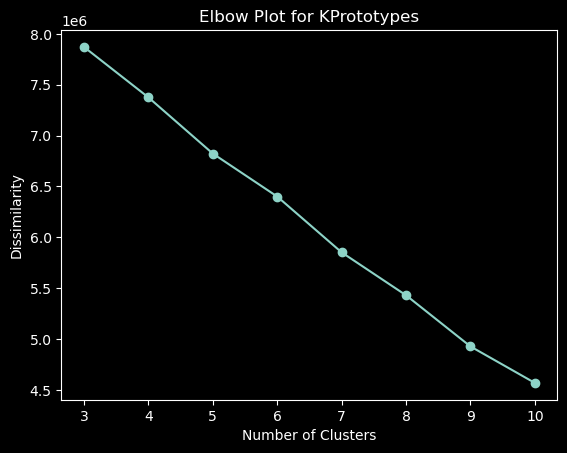

In [51]:
k_finder(df, 3, 11)

100%|██████████| 9/9 [00:58<00:00,  6.54s/it]


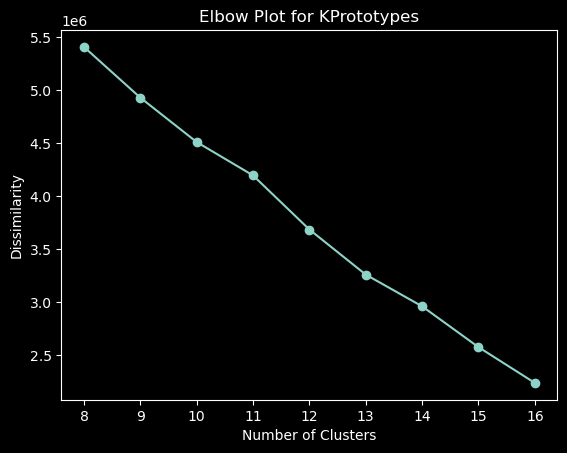

In [52]:
k_finder(df, 8, 17)

100%|██████████| 9/9 [01:18<00:00,  8.76s/it]


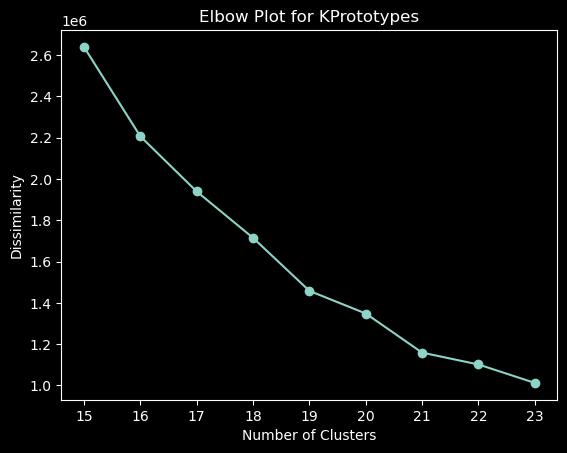

In [53]:
k_finder(df, 15, 24)

In [54]:
# Only use the X data so that it is easy to test for multicollinearity
X_data = data.drop('labels', axis = 1)

# Find the categorical columns that need to be made numerical for analysis
cat_cols = list(X_data.select_dtypes(include = 'object').columns)

# Creating a completely numerical dataset that is usable for analysis
x_num_data = pd.get_dummies(X_data, columns = cat_cols, 
                        # When testing for multi-co-linearity it is important to drop one of the dummies
                        # so that that column doesn't get flagged
                            drop_first = True)

In [ ]:
list(x_num_data.columns)

In [58]:
# Create the scaler object
scaler = StandardScaler()
# fit the scaler to the dataset
scaler.fit(x_num_data)
# Scale the dataset
x_num_data_scaled = pd.DataFrame(scaler.transform(x_num_data), columns = x_num_data.columns)

In [59]:
# Define X as all the feature variables in numerical form scaled
X = x_num_data_scaled

In [60]:
def k_finder(x, min, max, gam, cat_index):
    # Initialize cost list
    cost = []
    # Iterate for different amounts of centroids
    for k in tqdm(range(min,max)):
        # Use K-Prototype to generate a model. These parameters can change but hopefully we find something good
        KProto = KPrototypes(n_clusters = k, init = 'Cao', n_init = 10, gamma = gam,  verbose = 0, n_jobs = -1)
        # Use the KPrototypes model on the actual data
        cluster_labels = KProto.fit_predict(x, categorical = cat_index)
        # Append cost to the cost list for graphing later
        cost.append(KProto.cost_) 

    # An elbow plot of k vs the cost function to try to find the optimal k
    plt.plot(range(min,max), cost, marker = 'o');
    # Label the x-axis
    plt.xlabel('Number of Clusters');
    # label the y-axis
    plt.ylabel('Dissimilarity');
    # Give the plot a title
    plt.title('Elbow Plot for KPrototypes');
    # Show the plot
    plt.show()

In [62]:
cat_col = [col for col in X.columns if len(X[col].unique()) == 2]
cat_col_index = [list(X.columns).index(col) for col in cat_col]

In [65]:
3/(len(X.columns) - len(cat_col) + 3)

0.08571428571428572

In [64]:
print(len(cat_col))
print(len(X.columns))

81
113


In [66]:
k_finder(X, 3, 6, 0.08, cat_col_index)

 33%|███▎      | 1/3 [20:00<40:00, 1200.17s/it]